In [1]:
#-*- coding: utf-8 -*-
import sys
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(Y_class_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))


1 Physical GPUs, 1 Logical GPUs
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


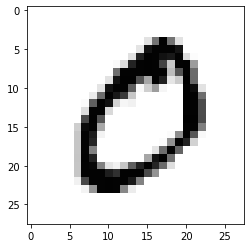

(28, 28)


In [4]:

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='Greys')
plt.show()

print(X_train[1].shape)


In [13]:

# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')


TypeError: 'numpy.float64' object is not iterable

In [6]:

# 차원 변환 과정
#X_train = X_train.reshape(X_train.shape[0], 784)  # (60000 x 28 x 28) -> (60000 x 784 ) 60000은 이미지의 총 갯수. 배치사이즈를 의미한다.
X_train = X_train.reshape(-1, 784)  # (60000 x 28 x 28) -> (60000 x 784 ) 60000은 이미지의 총 갯수. 배치사이즈를 의미한다.


In [7]:
print(X_train.shape)

(60000, 784)


In [8]:

X_train = X_train.astype('float64')  ## types를 float 64로 변환
X_train = X_train / 255  ## 0~ 255 값으로 노말라이즈 해주기

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255



In [9]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0])) ## 이미지 하나 확인하는게 [0]이므로 여기서도 [0]를 가져온다.

# 바이너리화 과정 0 ->[1 0 0 0 0 0 0 0 0 ]
Y_train = tf.keras.utils.to_categorical(Y_class_train)
Y_test = tf.keras.utils.to_categorical(Y_class_test)
print(Y_train[0])


class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         